In [1]:
import pandas as pd
from pandasql import sqldf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
results_df = pd.read_csv('results_df_selector_2.csv')
results_df.loc[results_df['model_name'] == 'extremelyfastdecisiontreeclassifier', 'model_name'] = 'EFDT'
results_df.loc[results_df['model_name'] == 'hoeffdingtreeclassifier', 'model_name'] = 'HT'

In [4]:
results_df

,model_name,drift_name,feature_selector_name,num_features,learning_threshold,iteration,accuracy,drifts_detected,model_args,ticker
0,HT,adwin,selectkbest,5,500,1,0.545,0,"grace_period=200, max_depth=None, delta=1e-07",AAPL
1,HT,adwin,selectkbest,5,500,2,0.545,0,"grace_period=200, max_depth=None, delta=1e-07",AAPL
2,HT,adwin,selectkbest,5,500,3,0.545,0,"grace_period=200, max_depth=None, delta=1e-07",AAPL
3,HT,adwin,selectkbest,5,500,4,0.545,0,"grace_period=200, max_depth=None, delta=1e-07",AAPL
4,HT,adwin,selectkbest,5,500,5,0.545,0,"grace_period=200, max_depth=None, delta=1e-07",AAPL
...,...,...,...,...,...,...,...,...,...,...
395,EFDT,bollingerband,tstat,20,500,1,0.727,4,"grace_period=200, max_depth=None, delta=1e-07",AAPL
396,EFDT,bollingerband,tstat,20,500,2,0.727,4,"grace_period=200, max_depth=None, delta=1e-07",AAPL
397,EFDT,bollingerband,tstat,20,500,3,0.727,4,"grace_period=200, max_depth=None, delta=1e-07",AAPL
398,EFDT,bollingerband,tstat,20,500,4,0.727,4,"grace_period=200, max_depth=None, delta=1e-07",AAPL


In [5]:
sqldf('''

select model_name
from results_df
group by model_name

''')

,model_name
0,EFDT
1,HT


### MODELS OVERVIEW

In [18]:
results_df['model_and_selector'] = results_df['model_name'] + ' + ' + results_df['feature_selector_name']
results_df['drift_and_selector'] = results_df['drift_name'] + ' + ' + results_df['feature_selector_name']

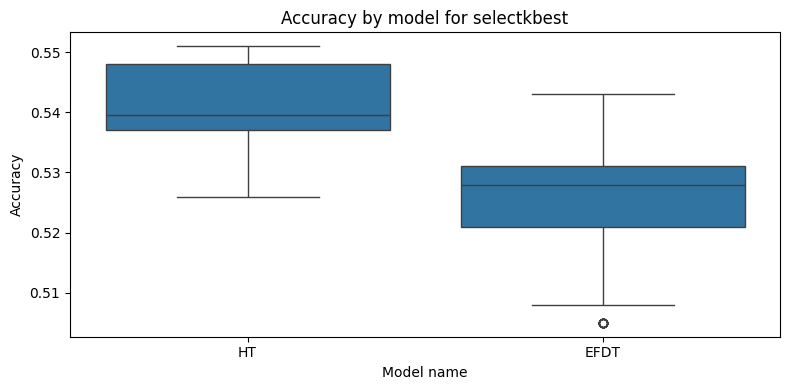

In [7]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='model_name', y="accuracy", data=results_df[results_df['feature_selector_name']=='selectkbest'])
plt.title("Accuracy by model for selectkbest")
plt.xlabel("Model name")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

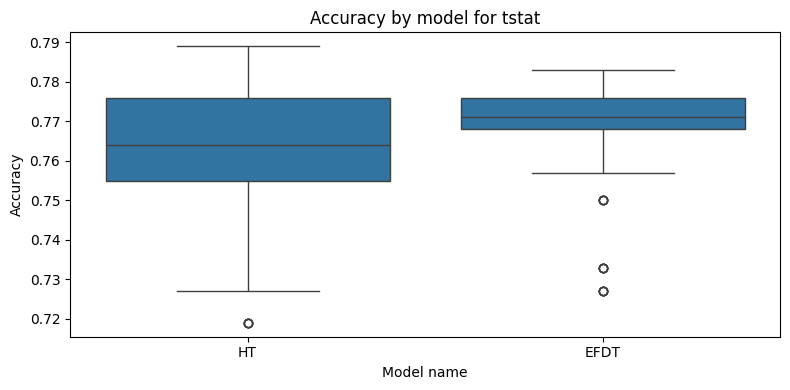

In [8]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='model_name', y="accuracy", data=results_df[results_df['feature_selector_name']=='tstat'])
plt.title("Accuracy by model for tstat")
plt.xlabel("Model name")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

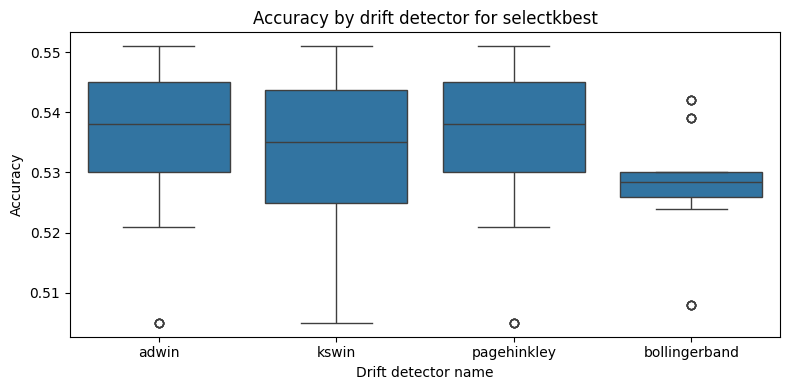

In [9]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='drift_name', y="accuracy", data=results_df[results_df['feature_selector_name']=='selectkbest'])
plt.title("Accuracy by drift detector for selectkbest")
plt.xlabel("Drift detector name")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

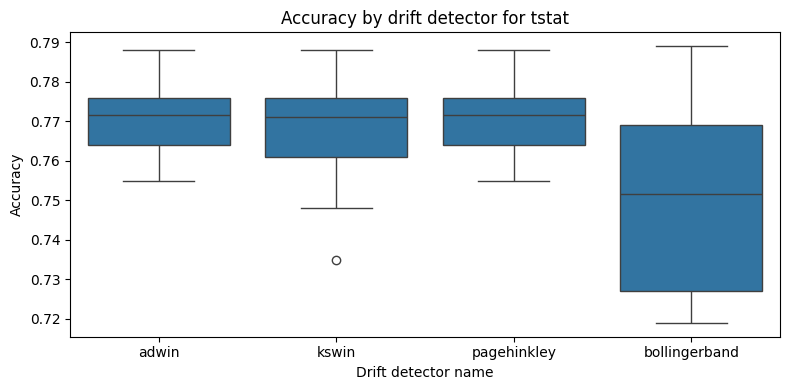

In [10]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='drift_name', y="accuracy", data=results_df[results_df['feature_selector_name']=='tstat'])
plt.title("Accuracy by drift detector for tstat")
plt.xlabel("Drift detector name")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

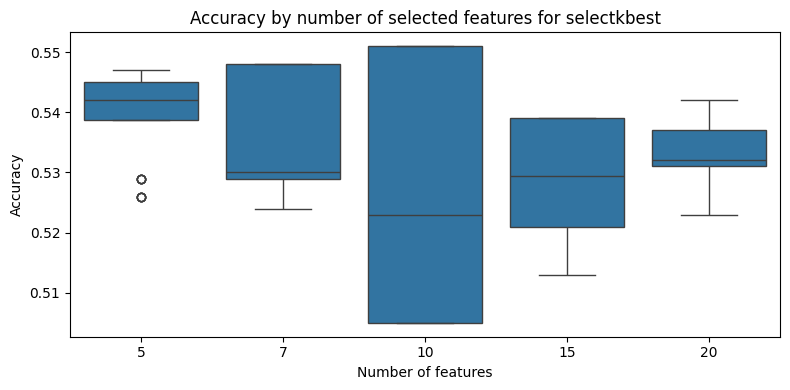

In [11]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='num_features', y="accuracy", data=results_df[results_df['feature_selector_name']=='selectkbest'])
plt.title("Accuracy by number of selected features for selectkbest")
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

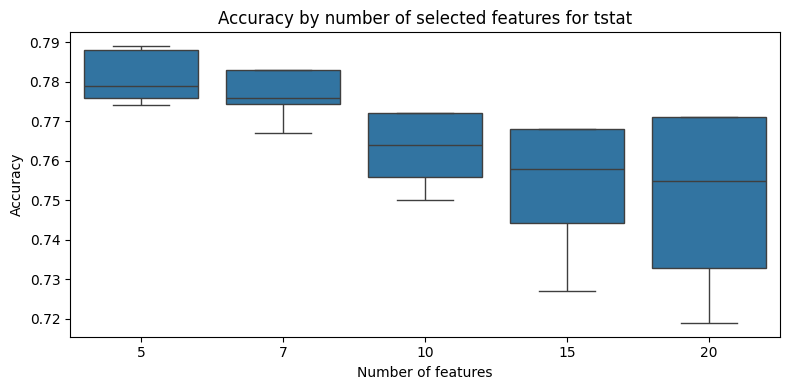

In [12]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='num_features', y="accuracy", data=results_df[results_df['feature_selector_name']=='tstat'])
plt.title("Accuracy by number of selected features for tstat")
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()